In [40]:
#!pip install ipywidgets
#!jupyter nbextension enable --py widgetsnbextension
#!jupyter labextension install @jupyter-widgets/jupyterlab-manager

In [41]:
import json
from pathlib import Path

In [42]:
path = Path("/home/jupyter/data/style_transfers/")

In [43]:
#quick reshaping, because I did it badly yesterday 
#this won't be needed in next run -- data will be saved in a nicer format for viz

temp = {
    "params": [],
    "images": {},
}
for experiment_dir in path.iterdir():
    style_injects = experiment_dir.name.split("-")[1:]
    style_injects_key = "-".join(style_injects)
    temp["images"][style_injects_key] = {}
    for elem in experiment_dir.iterdir():
        if elem.suffix == ".json":
            with open(elem) as f:
                d = json.load(f)
                d["style_injects"] = style_injects
                temp["params"].append(d)
        else:
            #print("hi", elem)
            epoch = str(elem.name).split("_")[0]
            temp["images"][style_injects_key][epoch] = elem 
            

In [44]:
def get_images_for_config(config, temp):
    return sorted({int(k): v for k, v in temp["images"]["-".join(config["style_injects"])].items()}.items())

In [45]:
conf = temp["params"][0]
outputs = get_images_for_config(conf, temp)

In [46]:
from PIL import Image as P_Image
#interactive widgets:
#https://towardsdatascience.com/interactive-controls-for-jupyter-notebooks-f5c94829aee6|

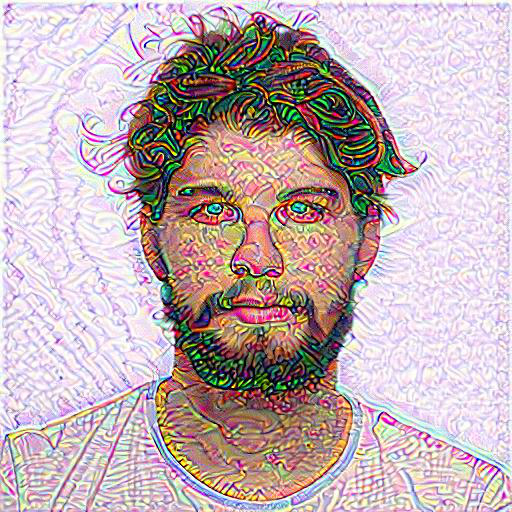

In [47]:
images = [P_Image.open(img) for epoch, img in outputs]
images[1]
#plt.imshow(images[0])

In [48]:
'''


images = [img for epoch, img in s]
@interact
def show_articles_more_than(images=images, x=0):
    print(x)
    #return plt.imshow(Image.open(images[x]))
'''


'\n\n\nimages = [img for epoch, img in s]\n@interact\ndef show_articles_more_than(images=images, x=0):\n    print(x)\n    #return plt.imshow(Image.open(images[x]))\n'

In [49]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from matplotlib import pyplot as plt

def browse_images(images):
    n = len(images)
    def view_image(i):
        plt.imshow(images[i])
        plt.imshow(images[2])

        #plt.title('Training: %s' % digits.target[i])
        plt.show()
    interact(view_image, i=(0,n-1))

In [50]:
all_images = [
    [P_Image.open(img) for epoch, img in get_images_for_config(conf, temp)]
    for conf in temp["params"]
]
len(all_images), len(all_images[4])

(30, 7)

In [51]:
browse_images(images)

interactive(children=(IntSlider(value=3, description='i', max=6), Output()), _dom_classes=('widget-interact',)…

In [59]:
import os
from IPython.display import Image
def browse_all(all_imgs):
    n = len(all_imgs[0]) #7
    def view_images(epoch):
        fig=plt.figure(figsize=(25, 25))
        w=100
        h=100
        columns = 6
        rows = 5
        experiment_slices = [imgs[epoch] for imgs in all_imgs]
        for i in range(1, columns*rows+1):
             #[[ ]]
            fig.add_subplot(rows, columns, i)
            plt.imshow(experiment_slices[i-1])
        plt.show()
    interact(view_images, epoch=(0,n-1))
        
'''
        w=20
h=20
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 4
for i in range(1, columns*rows +1):
    img = [P_Image.open(img) for epoch, img in outputs]get_images_for_config(conf, temp)
        np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

'''


'\n        w=20\nh=20\nfig=plt.figure(figsize=(8, 8))\ncolumns = 4\nrows = 4\nfor i in range(1, columns*rows +1):\n    img = [P_Image.open(img) for epoch, img in outputs]get_images_for_config(conf, temp)\n        np.random.randint(10, size=(h,w))\n    fig.add_subplot(rows, columns, i)\n    plt.imshow(img)\nplt.show()\n\n'

In [60]:
browse_all(all_images)

interactive(children=(IntSlider(value=3, description='epoch', max=6), Output()), _dom_classes=('widget-interac…

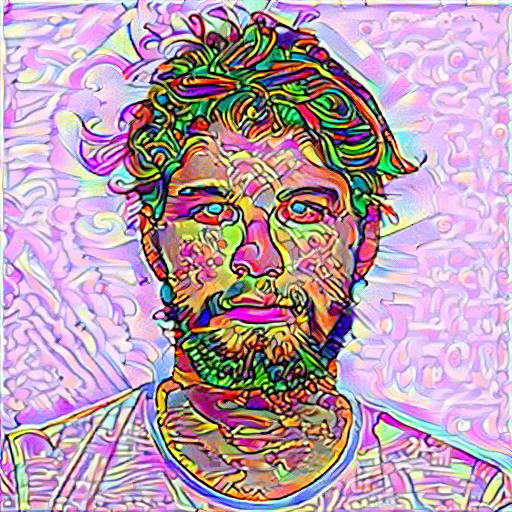

In [61]:
images[6]

In [13]:
fdir = '/home/jupyter/data/style_transfers/try-0-1-3-5-6-7-8-9-10-11-12-14-15/'
import os
from IPython.display import Image
@interact
def show_images(file=os.listdir(fdir)):
    print(file.split(".")[-1])
    if(file.split(".")[-1] != "json"):
        print("yaa")
        display(Image(fdir+file))
        return
    else:
        print("yoo", file)


interactive(children=(Dropdown(description='file', options=('config.json', '150_SL_3218_CL_493', '200_SL_2111_…

In [ ]:
images[1]